In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from numpy import concatenate

import pandas as pd
from pandas import DataFrame
from pandas import concat

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Vucar/car.csv")

Dataframe shape

In [4]:
print(df.shape)

(317636, 15)


Features of the data

In [5]:
print(df.columns)

Index(['id', 'list_id', 'list_time', 'manufacture_date', 'brand', 'model',
       'origin', 'type', 'seats', 'gearbox', 'fuel', 'color', 'mileage_v2',
       'price', 'condition'],
      dtype='object')


In [6]:
df.head()

,id,list_id,list_time,manufacture_date,brand,model,origin,type,seats,gearbox,fuel,color,mileage_v2,price,condition
0,148468232,108616925,1693378633111,1980,Jeep,A2,Mỹ,SUV / Cross over,4.0,MT,petrol,green,40000,380000000.0,used
1,149864917,109805135,1694308247000,2021,Honda,City,Nhật Bản,Sedan,5.0,AT,petrol,white,23000,455000000.0,used
2,149580046,109560282,1693462201000,2016,Kia,Rio,Hàn Quốc,NaN,NaN,AT,petrol,NaN,78545,295000000.0,used
3,148601679,108727914,1693493126176,2020,Toyota,Vios,Việt Nam,Sedan,5.0,MT,petrol,white,99999,368000000.0,used
4,149530234,109517456,1693313503000,2001,Fiat,Siena,NaN,NaN,NaN,MT,petrol,white,200000,73000000.0,used


## Base on the requirements, we will focus on brands that make up 90% of the total cars, also focusing on used cars only

Identify brands that make up 90% of the total cars

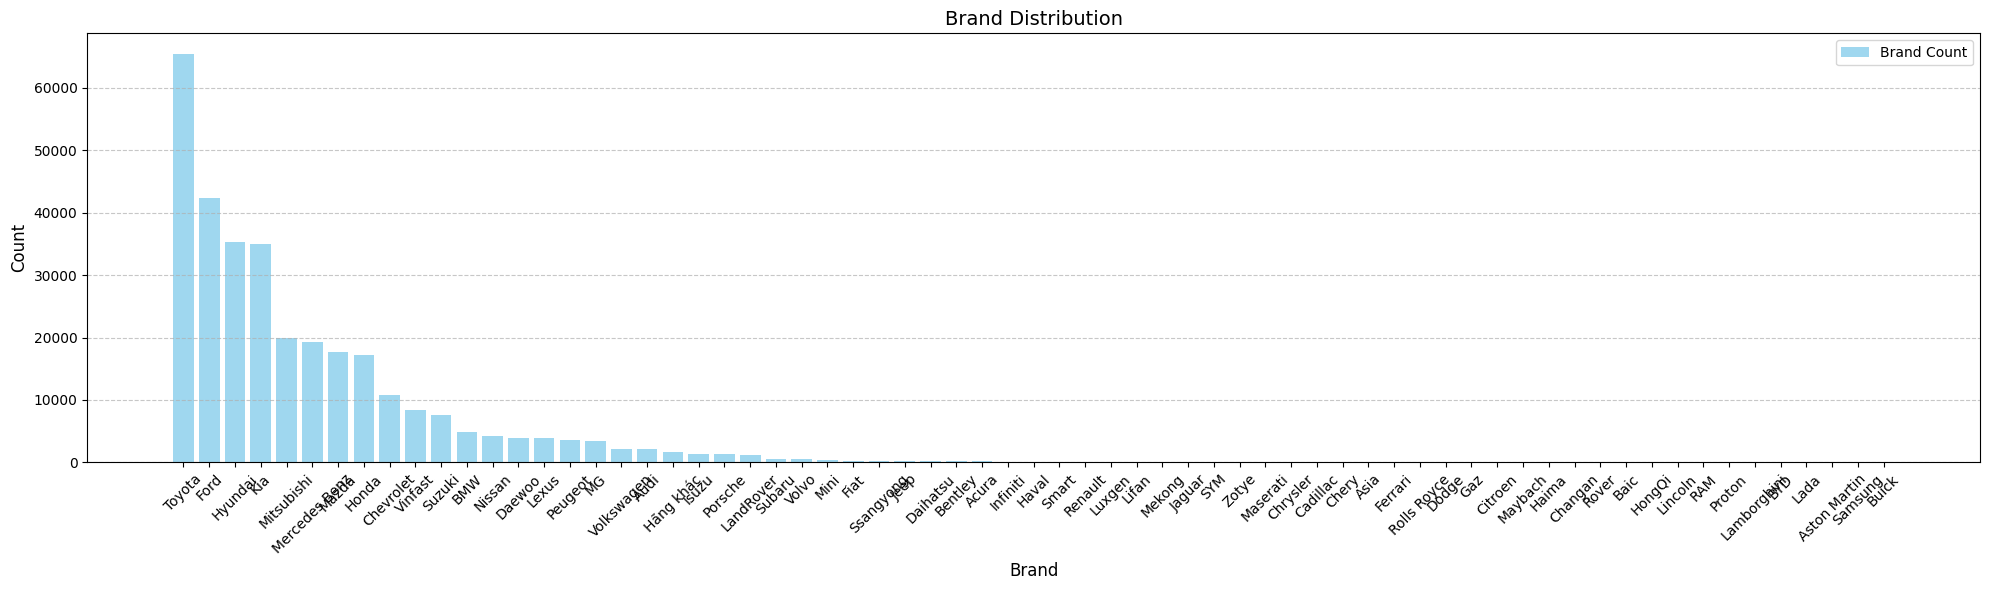

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


brand_counts = df['brand'].value_counts()

plt.figure(figsize=(20, 6))

plt.bar(brand_counts.index, brand_counts.values, color='skyblue', alpha=0.8, label='Brand Count')

plt.title('Brand Distribution', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

Find brands that make up 90% of total cars.

In [8]:
top_brands = df['brand'].value_counts(normalize=True).cumsum()
top_brands = top_brands[top_brands <= 0.9].index
print(top_brands)

Index(['Toyota', 'Ford', 'Hyundai', 'Kia', 'Mitsubishi', 'Mercedes Benz',
       'Mazda', 'Honda', 'Chevrolet', 'Vinfast', 'Suzuki', 'BMW'],
      dtype='object', name='brand')


In [9]:
df = df[df['brand'].isin(top_brands)]
df.head()

,id,list_id,list_time,manufacture_date,brand,model,origin,type,seats,gearbox,fuel,color,mileage_v2,price,condition
1,149864917,109805135,1694308247000,2021,Honda,City,Nhật Bản,Sedan,5.0,AT,petrol,white,23000,455000000.0,used
2,149580046,109560282,1693462201000,2016,Kia,Rio,Hàn Quốc,NaN,NaN,AT,petrol,NaN,78545,295000000.0,used
3,148601679,108727914,1693493126176,2020,Toyota,Vios,Việt Nam,Sedan,5.0,MT,petrol,white,99999,368000000.0,used
5,148583720,108712558,1694932494416,2022,Hyundai,Elantra,Việt Nam,Sedan,5.0,AT,petrol,white,45000,455000000.0,used
6,150061598,109974620,1694955795249,2018,Toyota,Innova,Việt Nam,SUV / Cross over,8.0,MT,petrol,white,60000,485000000.0,used


In [10]:
df.shape

(283802, 15)

Focusing on used cars only

In [11]:
df = df[df['condition'] == 'used']

In [12]:
df.head()

,id,list_id,list_time,manufacture_date,brand,model,origin,type,seats,gearbox,fuel,color,mileage_v2,price,condition
1,149864917,109805135,1694308247000,2021,Honda,City,Nhật Bản,Sedan,5.0,AT,petrol,white,23000,455000000.0,used
2,149580046,109560282,1693462201000,2016,Kia,Rio,Hàn Quốc,NaN,NaN,AT,petrol,NaN,78545,295000000.0,used
3,148601679,108727914,1693493126176,2020,Toyota,Vios,Việt Nam,Sedan,5.0,MT,petrol,white,99999,368000000.0,used
5,148583720,108712558,1694932494416,2022,Hyundai,Elantra,Việt Nam,Sedan,5.0,AT,petrol,white,45000,455000000.0,used
6,150061598,109974620,1694955795249,2018,Toyota,Innova,Việt Nam,SUV / Cross over,8.0,MT,petrol,white,60000,485000000.0,used


In [13]:
df.shape

(241695, 15)

## Exploratory Data Analysis and answering Data Analysis Questions

---







Check if there are duplicates

In [14]:
# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())




Number of duplicate rows: 177009


In [15]:
df.shape

(241695, 15)

Check the missing values

In [16]:

# Check for missing values
print("\nMissing Values Summary:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])




Missing Values Summary:
origin     74546
type       31729
seats      27996
gearbox     1371
fuel          44
color      73574
price         28
dtype: int64


Check the unique values in categorical variables

In [17]:
# Unique values in categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in '{col}': {df[col].nunique()}")


Unique values in 'brand': 12

Unique values in 'model': 298

Unique values in 'origin': 10

Unique values in 'type': 9

Unique values in 'gearbox': 4

Unique values in 'fuel': 4

Unique values in 'color': 12

Unique values in 'condition': 1


Distribution of numerical features

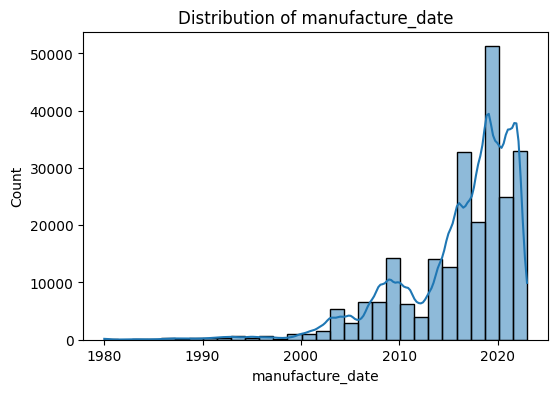

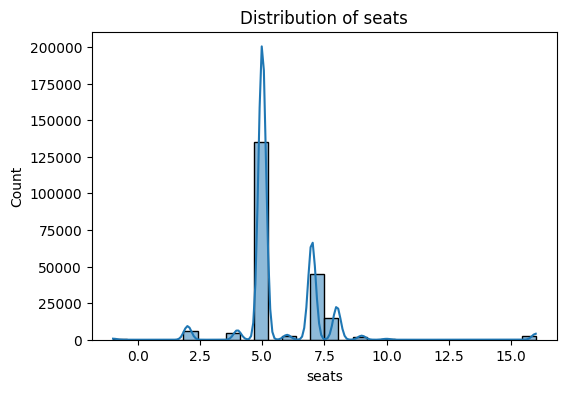

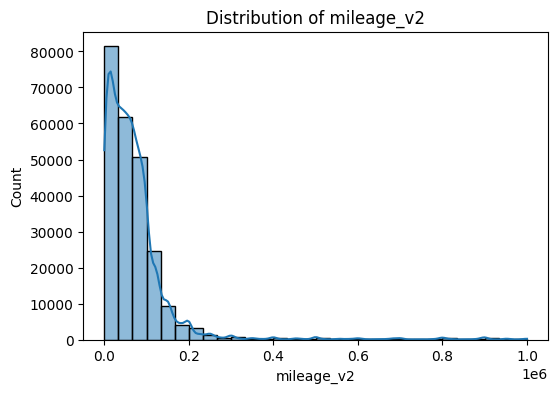

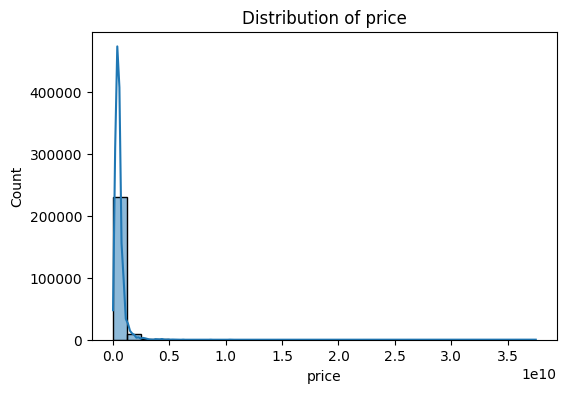

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns excluding 'id', 'list_id', and 'list_time'
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols[~numerical_cols.isin(['id', 'list_id', 'list_time'])]

# Histograms
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()



Bar plots for categorical features

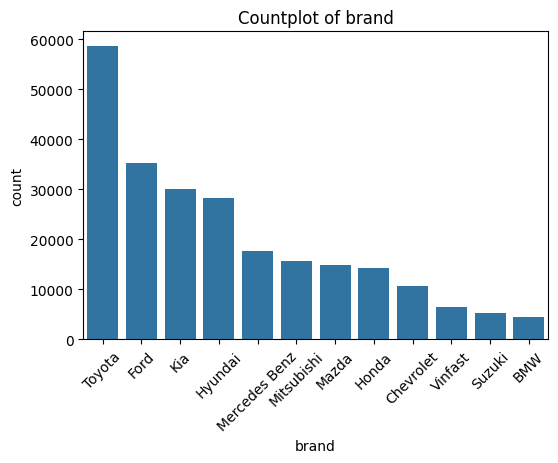

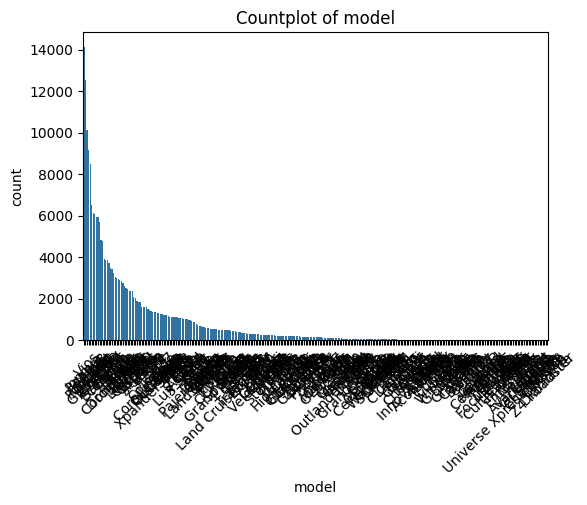

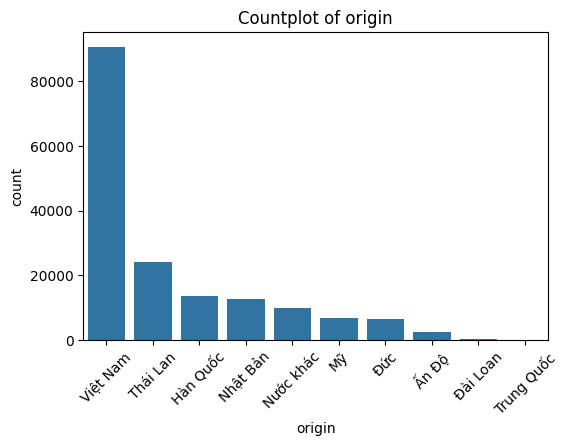

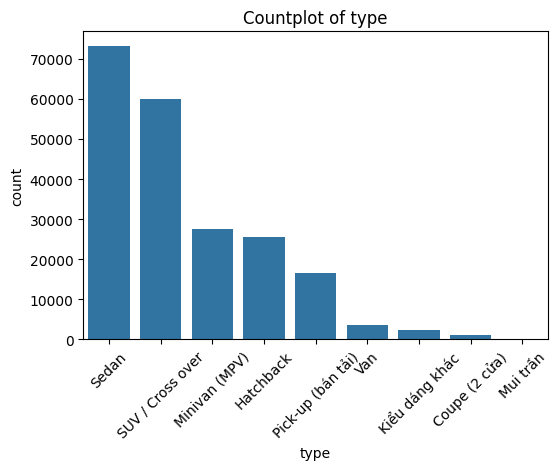

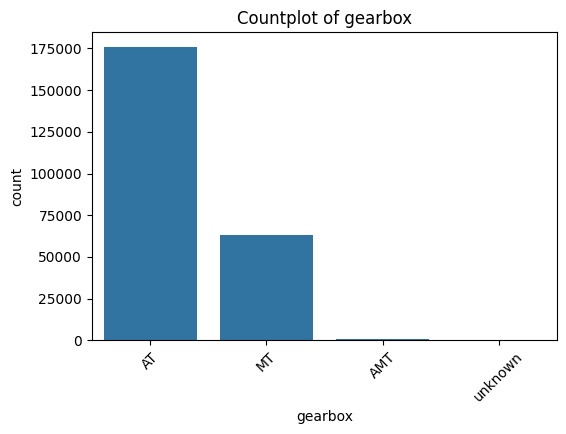

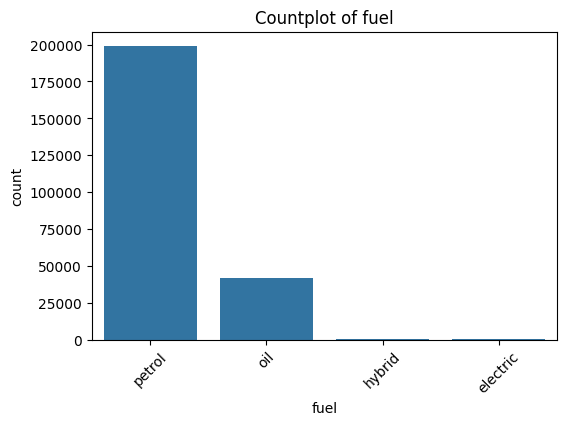

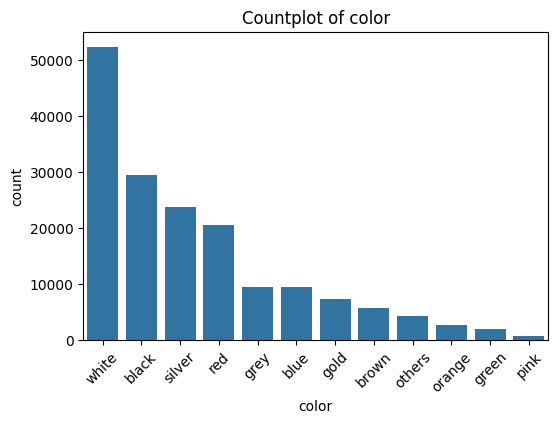

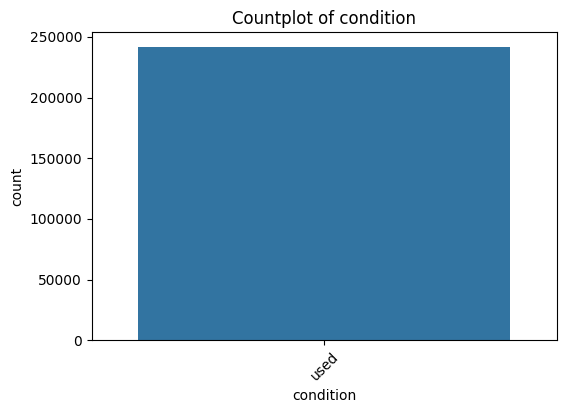

In [19]:
# Bar plots for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()


Now, to know more about the relationship of features and price, we use correlation matrix for numerical features and hypothesis testing for categorical features

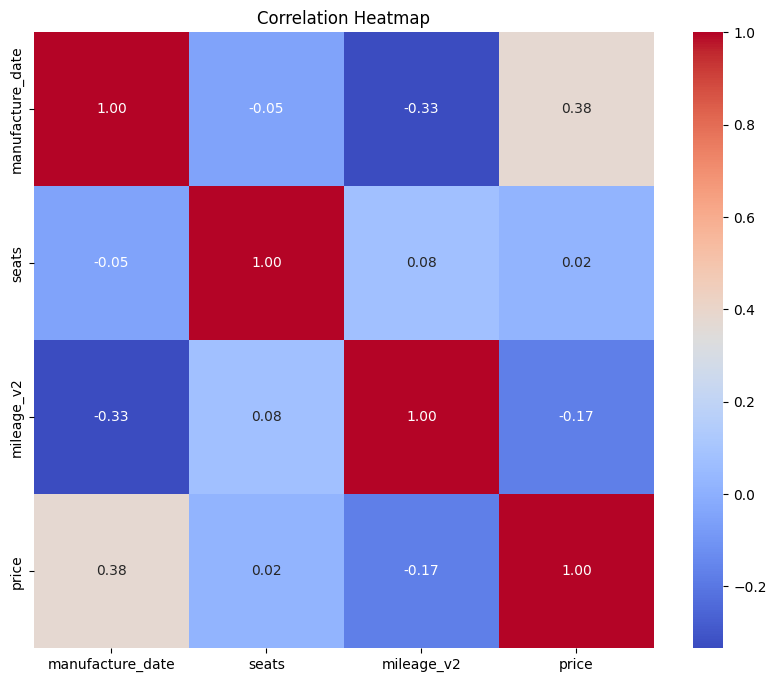

In [20]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation = df[numerical_cols].corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Section 4 question 1

A correlation coefficient of -0.17 between mileage and car price suggests a weak negative correlation. In general, a negative correlation means that as the mileage increases, the car price tends to decrease, although the relationship is weak in this case.

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, chi2_contingency

# Assuming the dataset is loaded into df
# Select categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# Initialize lists to store p-values and F-statistics
p_values = []
f_statistics = []

# Perform ANOVA for categorical variables
for feature in categorical_features:
    unique_categories = df[feature].unique()
    groups = [df['price'][df[feature] == category] for category in unique_categories]
    f_statistic, p_value = f_oneway(*groups)
    f_statistics.append(f_statistic)
    p_values.append(p_value)


# Categorical features with significant relationship with price based on p-value
top_categorical_features = [feature for feature, p_value in zip(categorical_features, p_values) if p_value < 0.05]
print("\nTop categorical features with significant association with price based on p-value:")
print(top_categorical_features)

# Categorical features with significant relationship with price based on F-statistic
top_categorical_features2 = [feature for feature, f_statistic in zip(categorical_features, f_statistics) if f_statistic > 1]
print("\nTop categorical features with significant association with price based on F-statistic:")
print(top_categorical_features2)


Top categorical features with significant association with price based on p-value:
[]

Top categorical features with significant association with price based on F-statistic:
[]


### Section 4 question 2

Based on the analysis using p-values and F-statistics, it appears that fuel type (such as petrol, diesel, etc.) does not have a statistically significant association with car price in this dataset. This means that, from a statistical standpoint, fuel type does not seem to have a noticeable or strong impact on the price of the cars in this particular dataset.

### Section 4 question 3

Cars with same segment means having the same type. So to compare two cars within the same segment, we can use orther important features, such as brand, model, or even least important features like manufacture date or model.

-------------------------------------------------------------------------------

So, only manufature date have a decent correlation (0.4) with price, all the other features almost show no correlation

## Data pre-processing

### 1. Duplicates handling

In [22]:
# Remove duplicate rows
df = df.drop_duplicates()

# Verify the removal of duplicates
print("\nNumber of duplicate rows after removal:", df.duplicated().sum())


Number of duplicate rows after removal: 0


### 2. Missing values handling

In [23]:
# Count the total missing values for each column
missing_counts = df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_counts / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage (%)': missing_percentage
}).sort_values(by='Missing Count', ascending=False)

print(missing_summary)

                  Missing Count  Missing Percentage (%)
color                     20859               32.246545
origin                    20578               31.812139
type                       8107               12.532851
seats                      7252               11.211081
gearbox                     323                0.499335
fuel                         14                0.021643
price                         9                0.013913
id                            0                0.000000
list_id                       0                0.000000
list_time                     0                0.000000
manufacture_date              0                0.000000
brand                         0                0.000000
model                         0                0.000000
mileage_v2                    0                0.000000
condition                     0                0.000000


Given the analysis that only manufacture date shows decent correlation with the target variable (price), while all other features show little to no correlation

#### Features encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Initialize a LabelEncoder


# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns


# Store encoders for each column
encoders = {}

# for col in categorical_columns:
#     label_encoder = LabelEncoder()
#     label_encoder.fit(df[col])
#     encoders[col] = label_encoder  # Save the fitted encoder for future use

#     # Apply the transformation to the training data
#     df[col] = label_encoder.transform(df[col])

# Apply Label Encoding
for col in categorical_columns:
    label_encoder = LabelEncoder()

    # Include 'missing' as a placeholder in the fit step
    df[col] = df[col].fillna('missing')
    label_encoder.fit(df[col].unique().tolist() + ['missing'])  # Ensure 'missing' is part of fitting

    encoders[col] = label_encoder  # Save the fitted encoder

    # Transform the column
    df[col] = label_encoder.transform(df[col])

# Revert placeholder back to NaN
for col in categorical_columns:
    encoder = encoders[col]
    df[col] = df[col].replace(encoder.transform(['missing'])[0], np.nan)


joblib.dump(encoders, 'encoders.pkl')

print("DataFrame after Label Encoding:")
print(df.head())

DataFrame after Label Encoding:
          id    list_id      list_time  manufacture_date  brand  model  \
1  149864917  109805135  1694308247000              2021      3     79   
2  149580046  109560282  1693462201000              2016      5    210   
3  148601679  108727914  1693493126176              2020     10    267   
5  148583720  108712558  1694932494416              2022      4    103   
6  150061598  109974620  1694955795249              2018     10    148   

   origin  type  seats  gearbox  fuel  color  mileage_v2        price  \
1     2.0   7.0    5.0      1.0   4.0   12.0       23000  455000000.0   
2     0.0   NaN    NaN      1.0   4.0    NaN       78545  295000000.0   
3     6.0   7.0    5.0      2.0   4.0   12.0       99999  368000000.0   
5     6.0   7.0    5.0      1.0   4.0   12.0       45000  455000000.0   
6     6.0   6.0    8.0      2.0   4.0   12.0       60000  485000000.0   

   condition  
1          1  
2          1  
3          1  
5          1  
6        

In [25]:
categorical_columns

Index(['brand', 'model', 'origin', 'type', 'gearbox', 'fuel', 'color',
       'condition'],
      dtype='object')

In [26]:
# Drop unnecessary columns
df = df.drop(['id', 'list_id', 'list_time', 'condition'], axis=1)

# df = df.dropna(subset=['price'])

Use KNN Imputer to impute missing data

In [27]:
# from sklearn.impute import KNNImputer


# # Create a copy of the DataFrame to encode categorical variables
# df_encoded = df.copy()

# # Apply KNN imputer to all columns
# imputer = KNNImputer(n_neighbors=7, weights='distance', metric='nan_euclidean')
# df_encoded[:] = imputer.fit_transform(df_encoded)

# # Assign imputed values back to the original DataFrame
# df = df_encoded.copy()


In [28]:
import joblib
from sklearn.impute import KNNImputer

df_impute = df.copy()

df_encoded = df.copy()
# Create and fit the KNNImputer
imputer = KNNImputer(n_neighbors=7, weights='distance', metric='nan_euclidean')
df_encoded[:] = imputer.fit_transform(df_encoded)
df = df_encoded.copy()

df_impute.drop(columns="price", inplace=True)
# Create and fit the KNNImputer
imputer = KNNImputer(n_neighbors=7, weights='distance', metric='nan_euclidean')
df_impute[:] = imputer.fit_transform(df_impute)

# Save the fitted imputer to a file
joblib.dump(imputer, 'knn_imputer.pkl')

print("KNNImputer model saved as 'knn_imputer.pkl'.")

KNNImputer model saved as 'knn_imputer.pkl'.


In [29]:
# Count the total missing values for each column
missing_counts = df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_counts / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage (%)': missing_percentage
}).sort_values(by='Missing Count', ascending=False)

print(missing_summary)

                  Missing Count  Missing Percentage (%)
manufacture_date              0                     0.0
brand                         0                     0.0
model                         0                     0.0
origin                        0                     0.0
type                          0                     0.0
seats                         0                     0.0
gearbox                       0                     0.0
fuel                          0                     0.0
color                         0                     0.0
mileage_v2                    0                     0.0
price                         0                     0.0


### 3. Deal with Outliers

We successfully handle missing values

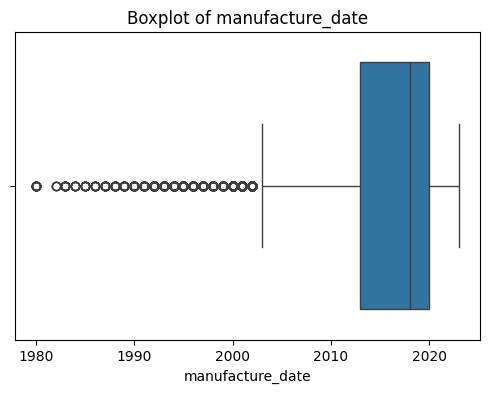

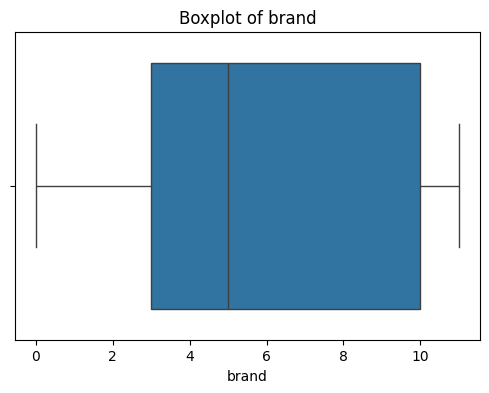

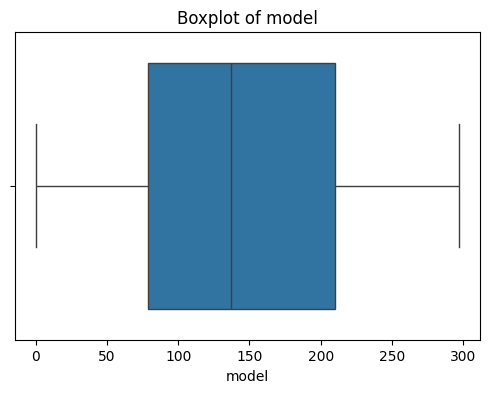

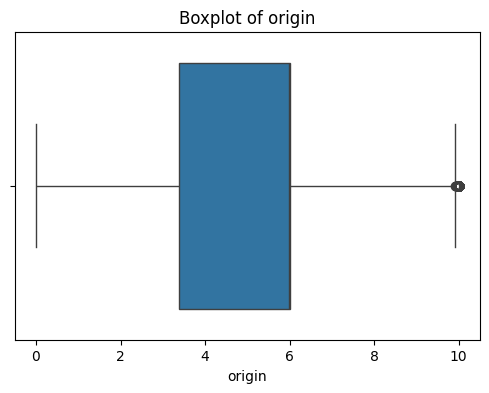

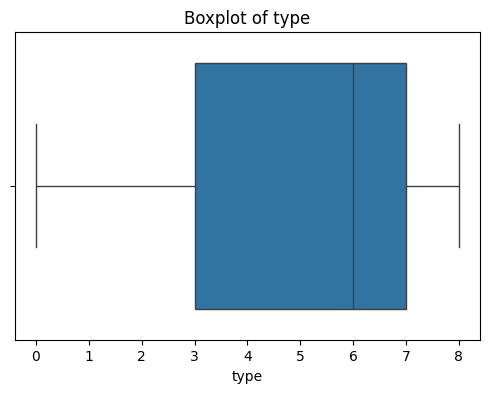

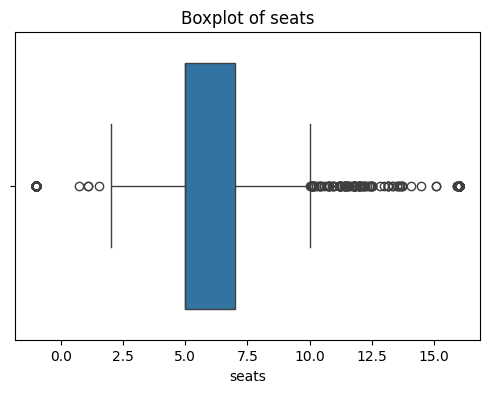

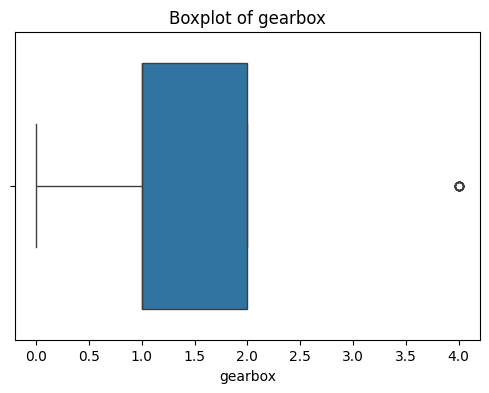

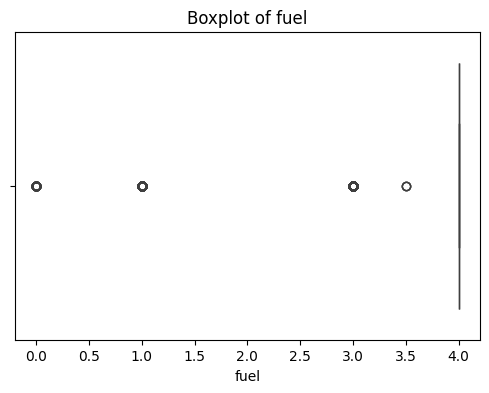

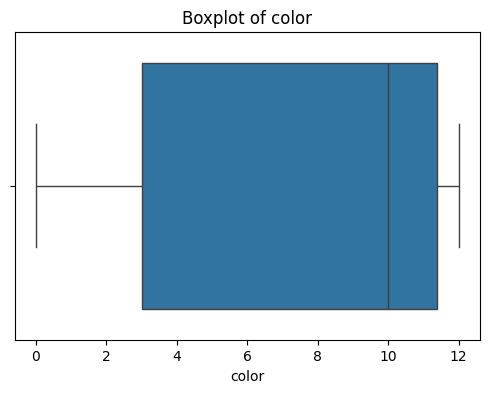

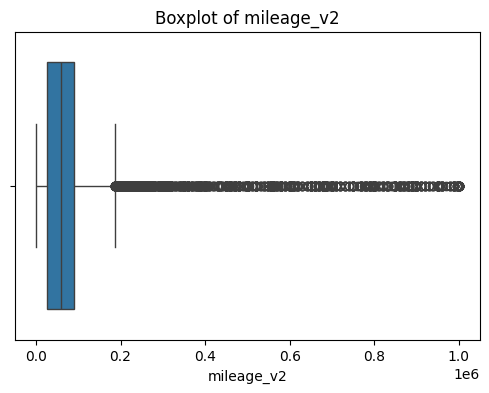

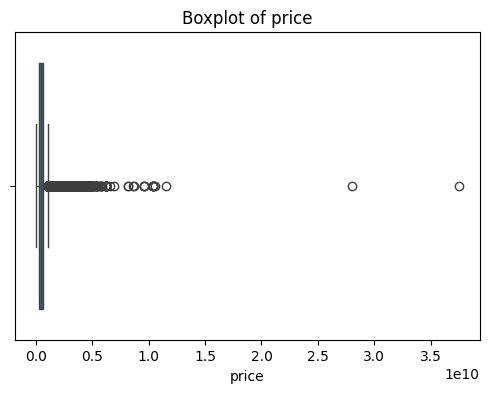

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols[~numerical_cols.isin(['id', 'list_id', 'list_time'])]

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [31]:
# Replace outliers with the median only for numerical columns

# Calculate outliers using the IQR method
outliers_combined = pd.DataFrame(False, index=df.index, columns=numerical_cols)

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)  # First quartile
    Q3 = df[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_combined[col] = (df[col] < lower_bound) | (df[col] > upper_bound)



for col in numerical_cols:
    median = df[col].median()
    df[col] = df[col].where(~outliers_combined[col], median)

In [32]:
# def cap_outliers(df, numerical_cols, lower_percentile=1, upper_percentile=99):
#     for col in numerical_cols:
#         lower_bound = df[col].quantile(lower_percentile / 100)
#         upper_bound = df[col].quantile(upper_percentile / 100)
#         df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

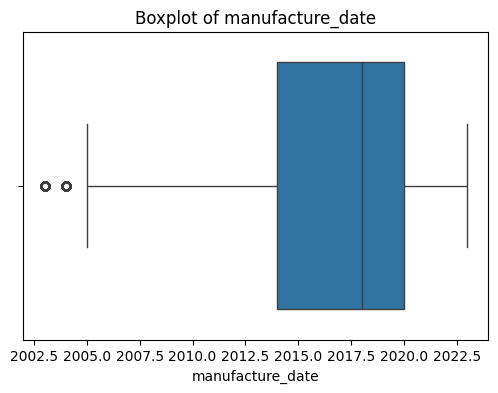

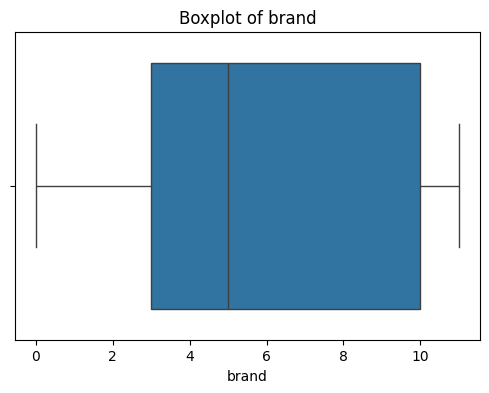

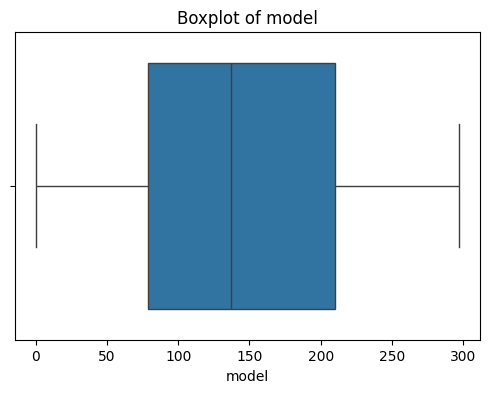

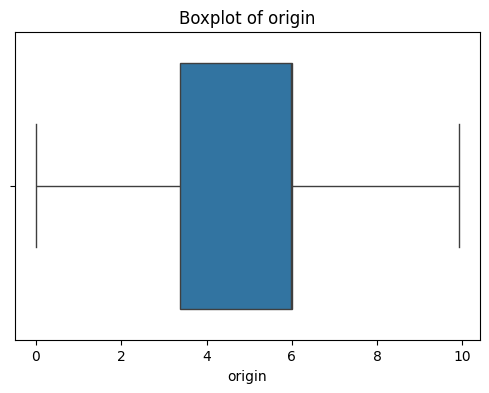

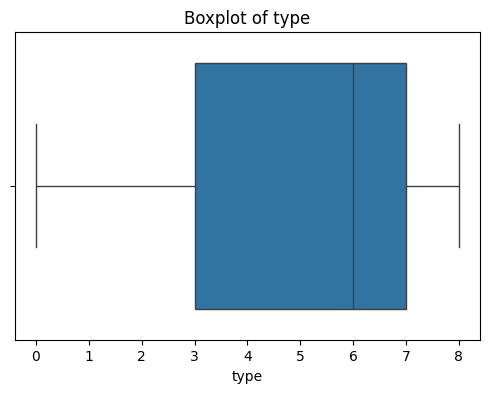

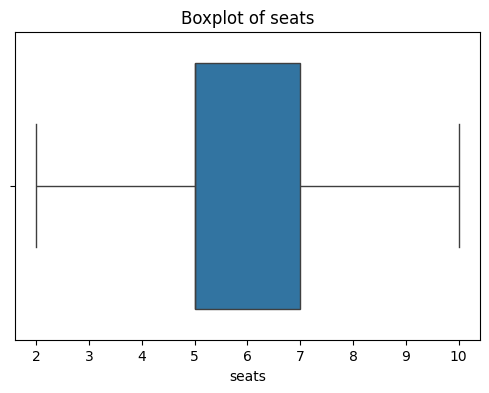

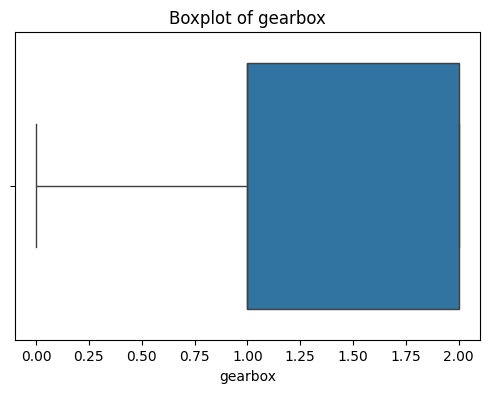

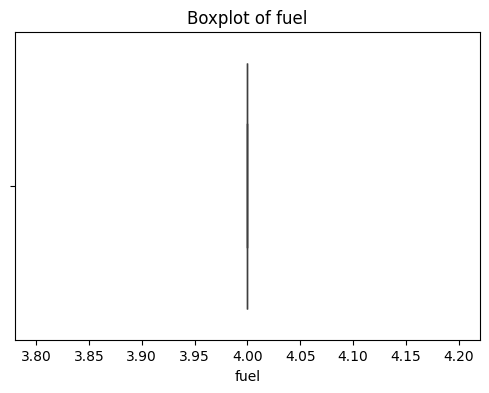

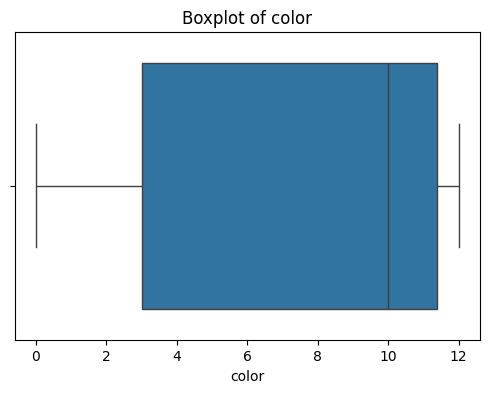

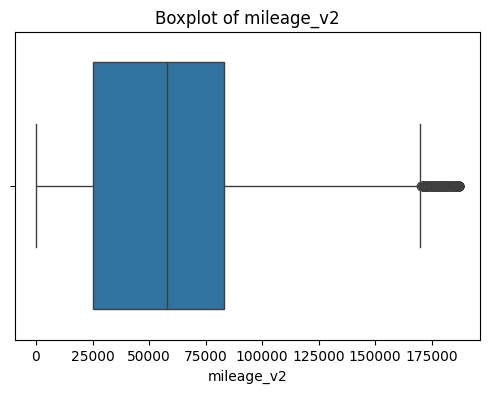

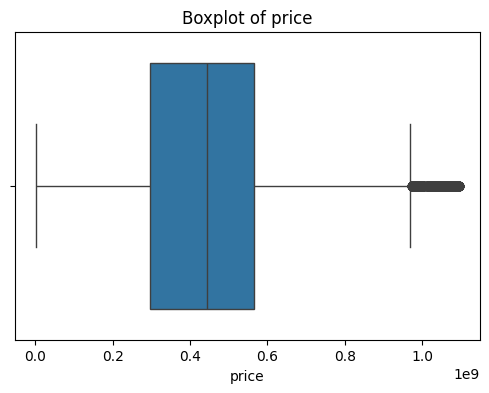

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()



### 4. Feature engineering

In [34]:
# Add the 'car_age' feature (2025 - manufacture_date)
df['car_age'] = 2025 - df['manufacture_date']
df.drop(columns=['manufacture_date'], inplace=True)



## Training

### Train-test split

In [35]:
# df['price'] = np.log(df['price'] + 0.0001)
df['mileage_v2'] = np.log(df['mileage_v2'] + 0.0001)
df['price'] = df['price'] / 1e6
df['car_age'] = np.log(df['car_age'] + 0.0001)

In [36]:
# from sklearn.preprocessing import StandardScaler
# import pandas as pd

# # Assuming 'price' is the column to be scaled
# scaler = StandardScaler()

# # Fit and transform the 'price' column
# df['price'] = scaler.fit_transform(df[['price']])

# # Print the first few rows to verify
# print("Standardized 'price' column:")
# print(df.head())

# # Save the scaler for use during inference
# import joblib
# joblib.dump(scaler, 'price_scaler.pkl')

# # When predicting on new data, load the scaler and transform the new price data
# # scaler = joblib.load('price_scaler.pkl')
# # new_data['price'] = scaler.transform(new_data[['price']])

In [37]:
from sklearn.model_selection import train_test_split

# Define the target variable (y) and features (X)
y = df['price']  # Assuming 'price' is the target column
X = df.drop(columns=['price'])  # Drop the target column to get the features

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # 80% train, 20% test
)

# Output shapes
print("Training Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Test Target Shape:", y_test.shape)

Training Features Shape: (51748, 10)
Test Features Shape: (12938, 10)
Training Target Shape: (51748,)
Test Target Shape: (12938,)


In [38]:
X_train[:5]

,brand,model,origin,type,seats,gearbox,fuel,color,mileage_v2,car_age
244682,2,102,6.000000,6.0,5.0,1.0,4.0,12.000000,11.156251,1.945924
18516,2,209,4.000000,5.0,5.0,1.0,4.0,0.000000,10.778956,1.791776
229775,4,137,4.147551,1.0,5.0,1.0,4.0,10.000000,8.699515,1.098646
166420,5,226,6.000000,7.0,5.0,1.0,4.0,7.120838,11.034890,1.386319
267375,4,22,6.000000,7.0,5.0,1.0,4.0,10.000000,10.043249,1.386319


In [39]:
y_train[:5]

,price
244682,455.0
18516,920.0
229775,395.0
166420,348.0
267375,458.0


### Train and save the model

I choose Random Forest as the model for predicting used car price because of its robustness to outliers, which is the problem I faced when dealing with this dataset. Also, RF can captures the non-linear relationship between features in the dataset without having to process the data too much.

Train and save the model

In [40]:
from sklearn.ensemble import RandomForestRegressor


# Initialize Random Forest model
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train model
model.fit(X_train, y_train)



RandomForestRegressor(n_estimators=200, random_state=42)

In [41]:
# save the model

joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

### Define the metric for testing the model

I will use R2 score as the main metric for testing the model

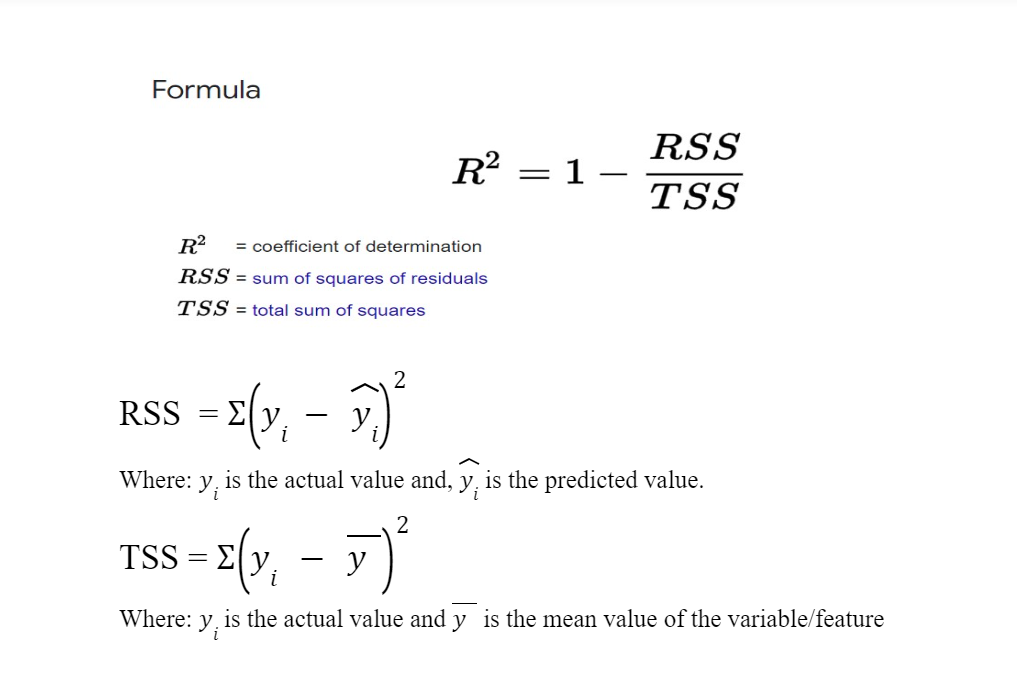

A higher R² score suggests a better fit of the model to the data, indicating that the model can make more accurate predictions, while a lower R² suggests a weaker fit and less explanatory power.

In [42]:
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import r2_score

# Assuming y_test is the true values and y_pred is the model's predictions
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

R^2 Score: 0.9142361518928315


Other metrics can be used: MAE, RMSE and MSE
RMSE of 61 means that, one average, the predicted car prices differ from the actual prices by approximately 61 million VND

In [44]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 22.17271528924458


In [45]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 62.82761596523452


In [46]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3947.309327874992


### Model inference

In [78]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Vucar/car.csv")

df.head()

,id,list_id,list_time,manufacture_date,brand,model,origin,type,seats,gearbox,fuel,color,mileage_v2,price,condition
0,148468232,108616925,1693378633111,1980,Jeep,A2,Mỹ,SUV / Cross over,4.0,MT,petrol,green,40000,380000000.0,used
1,149864917,109805135,1694308247000,2021,Honda,City,Nhật Bản,Sedan,5.0,AT,petrol,white,23000,455000000.0,used
2,149580046,109560282,1693462201000,2016,Kia,Rio,Hàn Quốc,NaN,NaN,AT,petrol,NaN,78545,295000000.0,used
3,148601679,108727914,1693493126176,2020,Toyota,Vios,Việt Nam,Sedan,5.0,MT,petrol,white,99999,368000000.0,used
4,149530234,109517456,1693313503000,2001,Fiat,Siena,NaN,NaN,NaN,MT,petrol,white,200000,73000000.0,used


In [79]:
data_point_with_nans = df.iloc[267]

print(data_point_with_nans)

id                      149474467
list_id                 109469338
list_time           1694643802709
manufacture_date             2020
brand                         Kia
model                     Morning
origin                   Việt Nam
type                    Hatchback
seats                         5.0
gearbox                        AT
fuel                       petrol
color                         red
mileage_v2                  25500
price                 300000000.0
condition                    used
Name: 267, dtype: object


In [81]:
import pandas as pd
import numpy as np
import joblib

# Example data point with NaNs
data_point_with_nans = {
    "id": 148601679,
    "list_id": 108727914,
    "list_time": 1693493126176,
    "manufacture_date": None,  # NaN value
    "brand": "Toyota",
    "model": None,
    "origin": "Việt Nam",
    "type": "Sedan",
    "seats": 5.0,
    "gearbox": "MT",
    "fuel": "petrol",
    "color": "white",
    "mileage_v2": None,  # NaN value
    "price": 368000000.0,
    "condition": "used"
}

# Convert the data point to a DataFrame
df = pd.DataFrame([data_point_with_nans])

# Load encoders
label_encoders = joblib.load('encoders.pkl')
categorical_columns = ['brand', 'model', 'origin', 'type', 'gearbox', 'fuel', 'color', 'condition']

# Apply label encoding for each categorical feature
for col in categorical_columns:
    encoder = label_encoders.get(col)  # Get the encoder for the column
    if encoder is not None:
        df[col] = df[col].fillna('missing')  # Placeholder for missing values
        df[col] = encoder.transform(df[col])  # Transform using the encoder
        # Revert placeholder back to NaN
        missing_encoded = encoder.transform(['missing'])[0]
        df[col] = df[col].replace(missing_encoded, np.nan)
    else:
        print(f"Warning: No encoder found for column '{col}'. Skipping this column.")

# Drop unnecessary columns
df.drop(columns=["id", "list_id", "list_time", "condition"], inplace=True)

# Separate ground truth price
ground_truth_price = df['price']
df.drop(columns=["price"], inplace=True)

# Handle missing values with KNN imputer
loaded_imputer = joblib.load('knn_imputer.pkl')
missing_values_mask = df.isnull()
df_imputed = loaded_imputer.transform(df)
df_numpy = np.where(missing_values_mask, df_imputed, df)
df_numpy = df_numpy.astype(float)
df = pd.DataFrame(df_numpy, columns=df.columns)

# Log transformations
df['mileage_v2'] = np.log(df['mileage_v2'] + 0.0001)

# Add 'car_age' feature
df['car_age'] = 2025 - df['manufacture_date']
df.drop(columns=['manufacture_date'], inplace=True)
df['car_age'] = np.log(df['car_age'] + 0.0001)

# Load the model and make predictions
model = joblib.load('random_forest_model.pkl')
predicted_price = model.predict(df)
predicted_price = predicted_price * 1e6

# Output results
print(f"Predicted Price: {predicted_price[0]}")
print(f"Ground Truth Price: {ground_truth_price.values[0]}")


Predicted Price: 229813147.72727272
Ground Truth Price: 368000000.0
